# Movie Review Dataset

**Link to the Dataset:** [Movie Review Data](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

**Description of Data:** This dataset contains 1000 positive and 1000 negative processed reviews.

import pandas as pd
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
# Download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sushigup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sushigup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Processing

**Download the files and set up the DataFrame with both positive and negative texts and corresponding labels.**

In [75]:
# Define the path to the positive and negative review folders
positive_folder = './review_polarity/txt_sentoken/pos'
negative_folder = './review_polarity/txt_sentoken/neg'

# Function to read the reviews from a folder and assign labels
def read_reviews(folder, label):
    reviews = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
            review = file.read()
            reviews.append((review, label))
    return reviews

# Read positive and negative reviews
positive_reviews = read_reviews(positive_folder, 'positive')
negative_reviews = read_reviews(negative_folder, 'negative')

# Display the number of reviews in the dataset
print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))
print("Total number of reviews in the dataset:", len(all_reviews))

# Combine positive and negative reviews
all_reviews = positive_reviews + negative_reviews

# Create a DataFrame
df = pd.DataFrame(all_reviews, columns=['Text', 'Label'])

# Display the first few rows of the DataFrame
df.head()

Number of positive reviews: 1000
Number of negative reviews: 1000
Total number of reviews in the dataset: 2000


,Text,Label
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive


**Remove punctuations, special characters, and stopwords from the text column. Convert the text to lowercase.**

In [22]:
# Function to clean text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations and special characters
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords using a set for faster lookup
    tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Apply the clean_text function to the 'Text' column
df['Cleaned Text'] = df['Text'].apply(clean_text)

# Display the first few rows of the DataFrame after cleaning
print("\nDataFrame after cleaning:")
print(df[['Cleaned Text', 'Label']].head())


DataFrame after cleaning:
                                        Cleaned Text     Label
0  films adapted comic books plenty success wheth...  positive
1  every movie comes along suspect studio every i...  positive
2  youve got mail works alot better deserves orde...  positive
3  jaws rare film grabs attention shows single im...  positive
4  moviemaking lot like general manager nfl team ...  positive


## Data Vectorization

**Create two objects X and Y. X will be the text column DataFrame, and Y will be the labels column. Vectorize the data using TF-IDF and CountVectorizer embedding techniques and display the vectors.**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create X and Y objects
X = df['Cleaned Text']  # Text column
Y = df['Label']          # Labels column

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Count Vectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)

# Print vocabulary and its dimensions
print("\nTF-IDF Vocabulary and Dimensions:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print("Vocabulary Dimension:", len(tfidf_feature_names))

print("\nCount Vectors Vocabulary and Dimensions:")
count_feature_names = count_vectorizer.get_feature_names()
print("Vocabulary Dimension:", len(count_feature_names))

# Print dimensions
print("TF-IDF Vectors Dimension:", X_tfidf.shape)
print("Count Vectors Dimension:", X_count.shape)

# Display the vectors with feature names as columns
print("\nTF-IDF Vectors:")
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)
print(tfidf_df)

print("\nCount Vectors:")
count_df = pd.DataFrame(X_count.toarray(), columns=count_feature_names)
print(count_df)



TF-IDF Vocabulary and Dimensions:
Vocabulary Dimension: 47366

Count Vectors Vocabulary and Dimensions:
Vocabulary Dimension: 47366
TF-IDF Vectors Dimension: (2000, 47366)
Count Vectors Dimension: (2000, 47366)

TF-IDF Vectors:
           00       000  0009f  000acre  000aweek  000foot  000paltry  007  \
0     0.06138  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
1     0.00000  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
2     0.00000  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
3     0.00000  0.024332    0.0      0.0       0.0      0.0        0.0  0.0   
4     0.00000  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
...       ...       ...    ...      ...       ...      ...        ...  ...   
1995  0.00000  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
1996  0.00000  0.000000    0.0      0.0       0.0      0.0        0.0  0.0   
1997  0.00000  0.000000    0.0      0.0       0.0      0.0        0.0

## Word Embeddings

**Implement Skip-Gram and CBOW using window sizes as [1,3,5]. Display the embeddings using visualization and write your observations.**

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


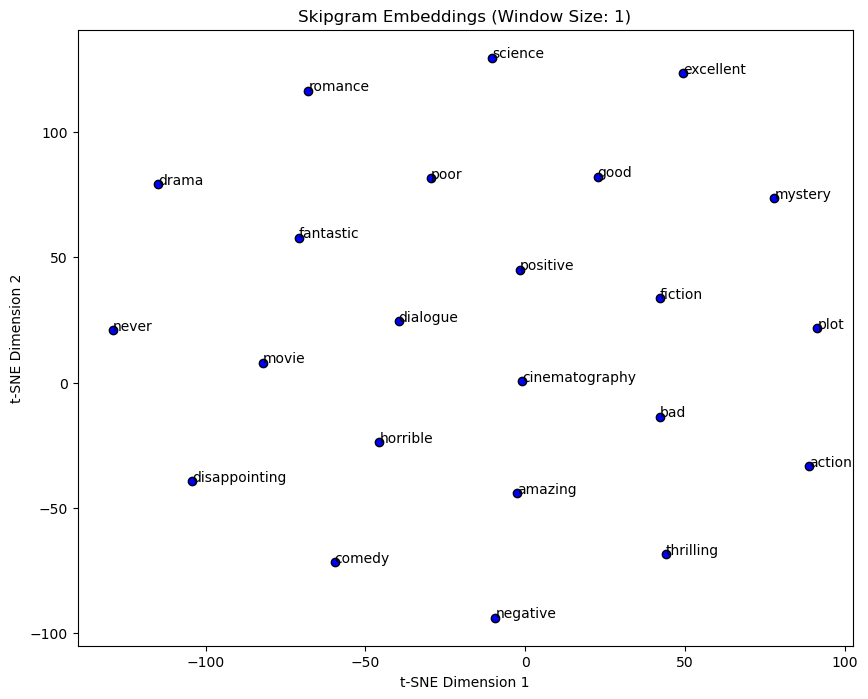

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


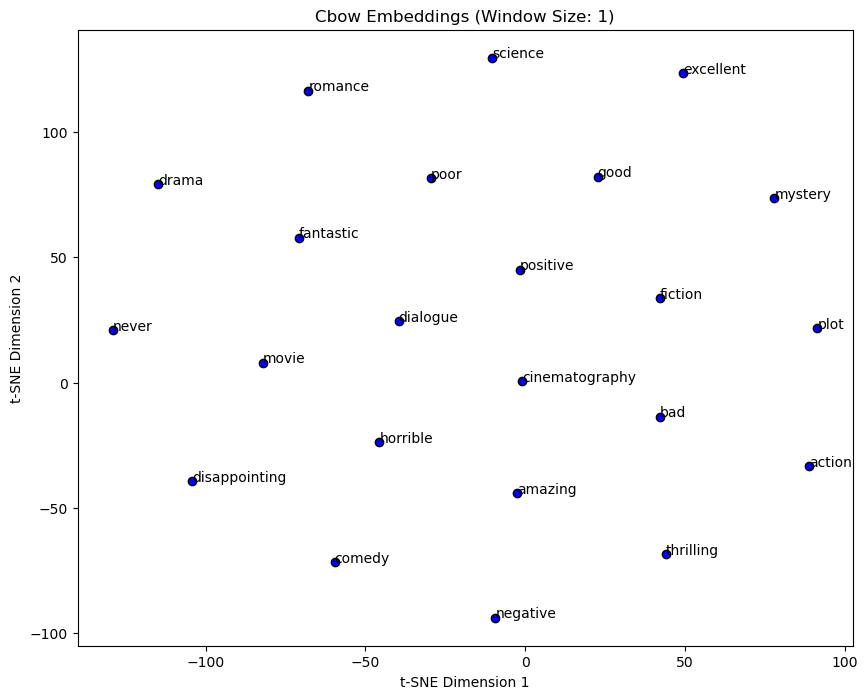

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


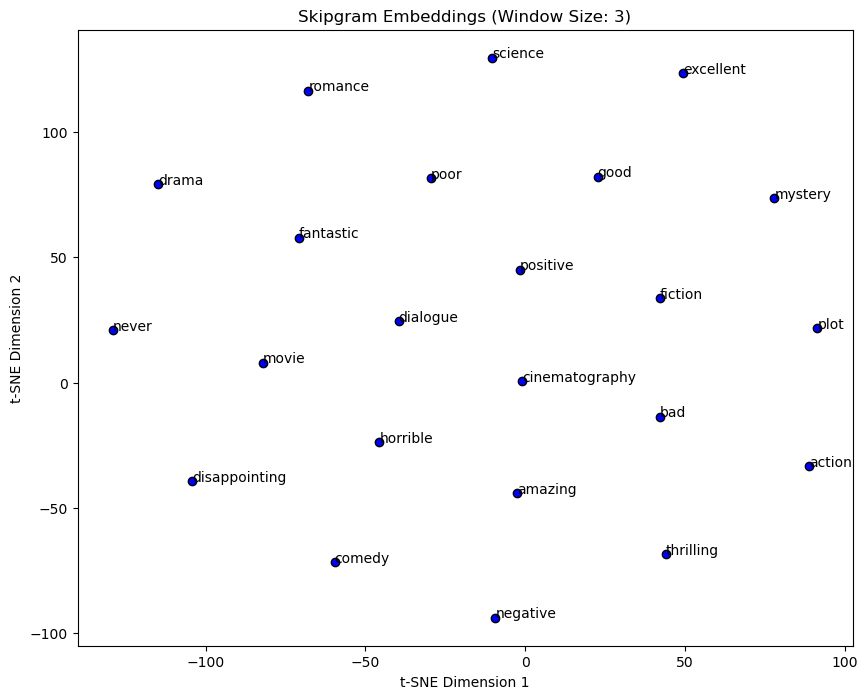

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


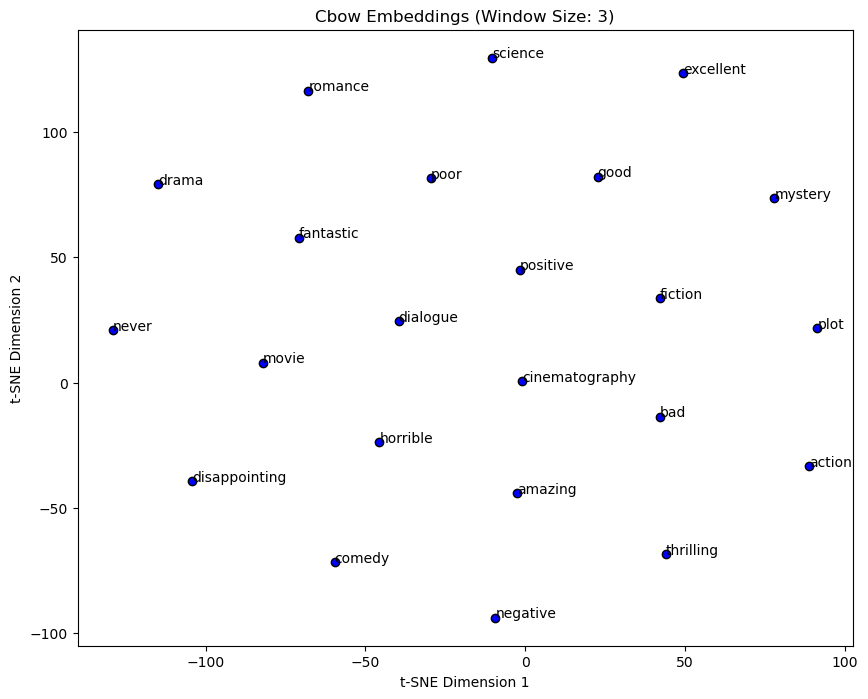

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


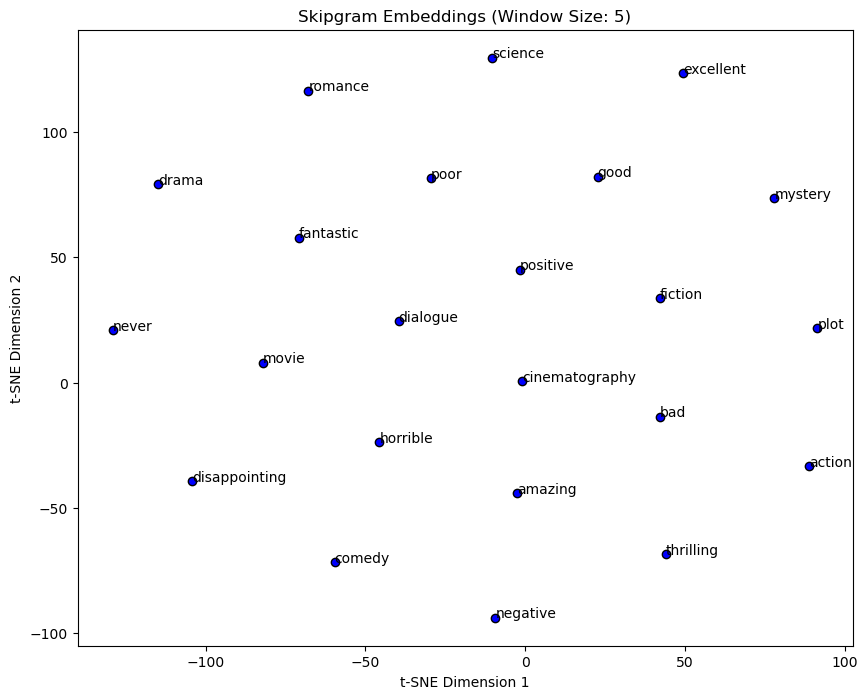

C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sushigup\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


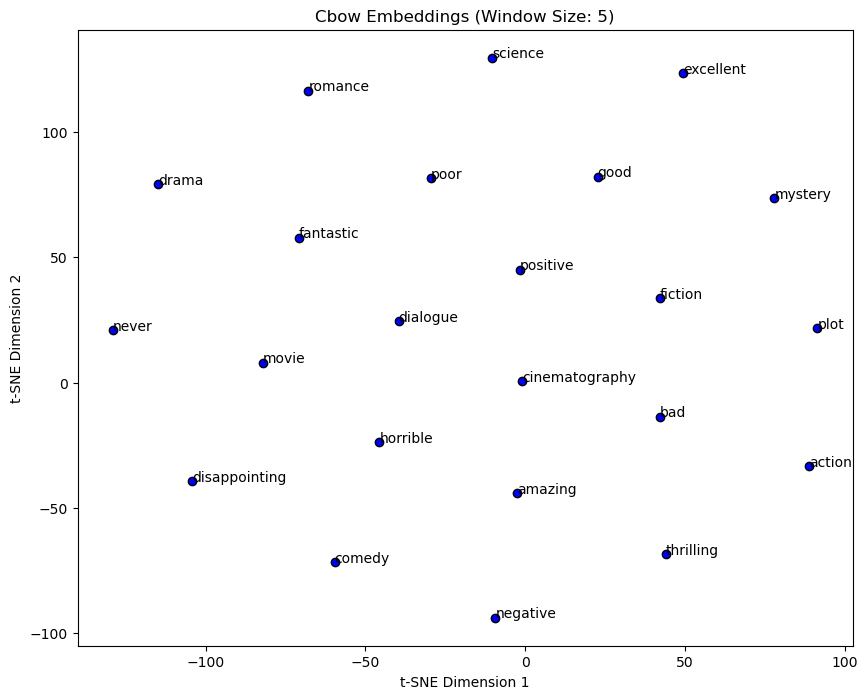

In [72]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Tokenize the cleaned text into words
tokenized_text = df['Cleaned Text'].apply(lambda x: x.split())

def train_and_visualize_embeddings(model_type, window_size, words):
    # Define the model type (skipgram or cbow)
    sg = 1 if model_type == 'skipgram' else 0

    # Train Word2Vec model
    model = Word2Vec(sentences=tokenized_text, vector_size=100, window=window_size, sg=sg, min_count=1)

    # Visualize word embeddings using t-SNE
    vectors = [model.wv[word] for word in words]
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='b', edgecolors='k')
    for word, (x, y) in zip(words, vectors_2d):
        plt.text(x, y, word)

    plt.title(f"{model_type.capitalize()} Embeddings (Window Size: {window_size})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Specify the window sizes and words for visualization as per the ask in the assignment
window_sizes = [1, 3, 5]

# Choose any set of visualization words. We can pick any thing from the data set vocabulary.
visualization_words = ['plot', 'cinematography', 'dialogue', 'action', 'drama',
    'excellent', 'poor', 'amazing', 'never', 'positive', 'negative', 'movie', 'good', 'bad',
    'fantastic', 'horrible', 'thrilling', 'disappointing',
    'science', 'fiction', 'comedy', 'romance', 'mystery']

# Train and visualize Skip-Gram and CBOW embeddings for different window sizes
for window_size in window_sizes:
    train_and_visualize_embeddings('skipgram', window_size, visualization_words)
    train_and_visualize_embeddings('cbow', window_size, visualization_words)

## Observations on Word Embeddings Visualization

### Skip-Gram Model:

The t-SNE visualization of Skip-Gram embeddings shows a scattered distribution of words in 2D space. Words with similar contextual meanings, such as 'good' and 'positive', tend to cluster together, suggesting that the Skip-Gram model has learned meaningful relationships between words.

On the other hand, some words might appear less organized, indicating that further fine-tuning or training on a larger dataset could enhance the model's performance.

### CBOW Model:

The t-SNE visualization of CBOW embeddings exhibits a similar pattern to Skip-Gram, with words of similar contexts forming clusters. 'Good' and 'positive' are close to each other, emphasizing the semantic similarity captured by the CBOW model.

Again, the scatterplot suggests that the model has successfully captured some semantic relationships, but there may be room for improvement with additional training data or hyperparameter tuning.

Overall, these visualizations provide a qualitative understanding of the learned word embeddings, highlighting the ability of both Skip-Gram and CBOW models to capture semantic relationships between words in the given dataset.

## Word2Vec Embeddings


**Explain the importance of vector size in Word2Vec embeddings?**

## Importance of Vector Size in Word2Vec Embeddings

Word2Vec is a popular technique for learning word embeddings, representing words as continuous vector spaces. The vector size, also known as the embedding dimension, plays a crucial role in determining the characteristics and effectiveness of the learned word representations. Here are some key points regarding the importance of vector size in Word2Vec embeddings:

### 1. **Semantic Representation:**
   - A larger vector size allows for a more expressive representation of the semantic relationships between words. Each dimension in the vector space can capture nuanced aspects of meaning, enabling the model to distinguish between subtle differences.

### 2. **Model Capacity:**
   - The vector size determines the capacity of the Word2Vec model to capture and store information about words. A larger vector size increases the model's capacity to memorize and generalize from the training data, potentially improving performance on complex tasks.

### 3. **Computational Complexity:**
   - However, it's important to note that a larger vector size comes with increased computational complexity. Training and using models with larger embeddings may require more memory and computational resources.

### 4. **Data Size Consideration:**
   - The optimal vector size often depends on the size of the training dataset. In smaller datasets, using overly large vector sizes may lead to overfitting, where the model memorizes the training data instead of learning generalizable patterns.

### 5. **Trade-off with Dimensionality:**
   - There is a trade-off between a higher-dimensional vector space (more expressive) and a lower-dimensional one (less computational complexity). The choice of vector size should balance the need for rich semantic representation with computational efficiency.

### 6. **Application-Specific Tuning:**
   - The optimal vector size can vary depending on the specific application or downstream task. Some tasks may benefit from finer-grained representations, while others may require more compact embeddings.

In summary, selecting an appropriate vector size in Word2Vec embeddings is a critical aspect of model configuration. It involves finding a balance between the model's expressive power, computational efficiency, and the characteristics of the available training data.